Combinadores lineales adaptativos (ADALINEs)
===

* 30:00 min | Última modificación: Abril 19, 2021 | [YouTube]()

En este taller se presentan los fundamentos matemáticos de los combinadores lineales adaptativos o ADALINEs.

## Perceptrón bipolar con entradas y pesos reales

El modelo que se presenta a continuación representa un perceptrón bipolar (con salida $\in \{-1, +1\}$) con entradas y pesos reales:

![assets/AdalinePronostico-02.png](assets/AdalinePronostico-02.png)

La entrada neta se calcula como:

$$v = w_0 + \sum_{i=1}^n w_i x_i$$

La cual puede ser reescrita usando notación matricial al hacer $$\mathbf{w} = [w_0, w_1, ..., w_n]^T$$ y $$\mathbf{x} = [+1, x_1, x_2, ..., x_n]^T$$ tal que:

$$v = \mathbf{w}^T \mathbf{x}$$

La regla de activación es:

$$\varphi(v) = 
\begin{cases}      
      +1, & \text{Si $v \ge 0$}\\
      -1, & \text{Si $v \lt 0$}\\
\end{cases}$$

Este tipo de perceptrón puede ser utilizado para representar funciones lógicas bipolares:

![assets/AdalinePronostico-03.png](assets/AdalinePronostico-03.png)

**Actividad.---**  Especifique pesos que permitan representar las siguientes funciones:

![assets/AdalinePronostico-04.png](assets/AdalinePronostico-04.png)

## Combinador lineal adaptativo

La primera parte del perceptrón bipolar corresponde a un combinador lineal adaptativo (ADALINE), mientras que la función de activación es un conmutador bipolar.

![assets/AdalinePronostico-05.png](assets/AdalinePronostico-05.png)

De esta forma, la salida del combinador lineal adaptativo o ADALINE es:

$$v=w_0 + \sum_i w_i x_i$$

## Estimación de los parámetros del modelo

El combinador lineal adaptativo puede:


* Adaptarse automáticamente a ambientes dinámicos (¿auto-optimización?).


* Realizar tareas de filtrado, pronóstico y toma de decisiones .


* Eextrapolar el comportamiento de un sistema con el fin de manejar nuevas situaciones.


* Reproducir el comportamiento de sistemas no lineales con parámetros cambiantes en el tiempo.

Un ADALINE es un sistema adaptativo de lazo cerrado. En los sistemas de lazo cerrado:


* Se conocen las variables de entrada al sistema o $x_k$.


* El modelo adaptativo (un ADALINE en este caso) es usado para realizar un pronóstico del resultado del sistema ($v$).


* Posteriormente, se conoce la salida del sistema o variable dependiente ($d$).


* Los parámetros del sistema adaptativo son ajustados a partir de los valores de $v$ y $d$.


En el caso del problema planteado, el pronóstico se realiza usando el siguiente sistema adaptativo de lazo cerrado, en el cual, el modelo adaptativo es un ADALINE.

![assets/AdalinePronostico-06.png](assets/AdalinePronostico-06.png)

## Algoritmo $\mu$-LMS o gradiente descendente

A partir de este punto la salida del combinador lineal adaptativo se notará como $y$ para mantener la consistencia con otros tutoriales.

Se obtiene al aplicar el algoritmo del gradiente descendente para minimizar el error cuadrático instántaneo:

$$e^2 = (d - y)^2$$

con:

$$y = w_0 + \sum_i w_i x_i$$

entonces:

$$e^2 = (d - w_0  - \sum_i w_i x_i)^2$$

Para encontrar el valor óptimo de los parámetros $\mathbf{w}$ se usa el gradiente descendente:

$$
\mathbf{w}_{k+1} = \mathbf{w}_{k} - \mu \frac{\partial}{\partial \mathbf{w}} e_k^2
$$ 

Las derivadas del error instantaneo son:

$$
\begin{split}
\frac{\partial}{\partial w_0} e^2 
    & = \frac{\partial}{\partial w_0}  (d - w_0  - \sum_i w_i x_i)^2 \\ \\
    & = 2 \cdot (d - w_0  - \sum_i w_i x_i) \cdot \frac{\partial}{\partial w_0} (d - w_0  - \sum_i w_i x_i) \\ \\
    & = 2 \cdot (d - w_0  - \sum_i w_i x_i) \cdot (-1) \\ \\
    & = -2 \cdot e 
\end{split}
$$

y

$$
\begin{split}
\frac{\partial}{\partial w_i} e^2 
    & = \frac{\partial}{\partial w_i}  (d - w_0  - \sum_i w_i x_i)^2 \\ \\
    & = 2 \cdot (d - w_0  - \sum_i w_i x_i) \cdot \frac{\partial}{\partial w_i} (d - w_0  - \sum_i w_i x_i) \\ \\
    & = 2 \cdot (d - w_0  - \sum_i w_i x_i) \cdot (-x_i) \\ \\
    & = -2 \cdot e \cdot x_i
\end{split}
$$

De esta forma, la ecuación del gradiente descendente pueden escribirse como:

$$
\begin{split}
w_0^{(k+1)} 
    & = w_0^{(k)} - \mu \cdot \frac{\partial}{\partial w_0} (e^{(k)})^2  \\ \\
    & = w_0^{(k)} - \mu \cdot (-2e^{(k)}) \\ \\
    & = w_0^{(k)} + 2 \mu e^{(k)}
\end{split}
$$

$$
\begin{split}
w_i^{(k+1)} 
    & = w_i^{(k)} - \mu \cdot \frac{\partial}{\partial w_0} (e^{(k)})^2  \\ \\
    & = w_i^{(k)} - \mu \cdot (-2 \cdot e^{(k)} \cdot x_i) \\ \\
    & = w_i^{(k)} + 2 \mu e^{(k)} x_i
\end{split}
$$

Note que las ecuaciones anteriores corresponden al esquema de *aprendizaje online* por lo que puede usarse el gradiente descendente estocástico.

Se ha encontrado que el algoritimo converge si:

$$
0 < \mu < \frac{1}{1 + \sum_{i=0}^n E[x_i^2]}
$$

## Implementación

In [2]:
class Adaline:
    def __init__(
        self,
        learning_rate=0.001, # tasa de aprendizaje
        max_epochs=100,      # número máximo de iteraciones sobre el set de datos
        shuffle=False,       # mezcla patrones para aprendizaje online
        random_state=None,   #
        warm_start=False,    #
    ): 

        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.warm_start = warm_start
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):

        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            d = np.array(y)
        else:
            d = y.copy()

        if self.random_state is not None:
            np.random.RandomState(self.random_state)

        if self.coef_ is None or self.warm_start is False:
            self.coef_ = np.random.uniform(-1, 1, X.shape[1])

        if self.intercept_ is None or self.warm_start is False:
            self.intercept_ = np.random.uniform(-1, 1, 1)

        errors2 = []
        forecasts = []

        for epoch in range(self.max_epochs):

            if self.shuffle is True:
                n = list(range(X.shape[0]))
                np.random.shuffle(n)
                X = X[n, :]
                d = d[n]

            for i in range(X.shape[0]):
                u = np.dot(X[i, :], self.coef_) + self.intercept_
                e = (d[i] - u)[0]
                self.coef_ += 2 * self.learning_rate * e * X[i, :]
                self.intercept_ += 2 * self.learning_rate * e
                errors2.append(e ** 2)
                forecasts.append(u)

        return errors2, forecasts

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        u = np.dot(X, self.coef_) + self.intercept_
        return u

## Caso de aplicación --- Pronóstico adaptativo

### Definición del problema

Hay un sistema que emite una señal contaminada con ruído de forma continua. Ejemplos de este tipo de señal pueden ser: 

* Los precios de un producto en un mercado.
* Una tasa de cambio.
* La demanda de un producto.
* La salida de un sensor en una máquina.

Para la toma de decisiones se desea obtener pronósticos de sus valores futuros a partir de los valores pasados de la señal.

En este tipo de problemas no es posible modelar el sistema que genera la señal de salida $d(t)$. Adicionalmente, la señal está contaminada con ruído por lo que resulta imposible pronosticarla de forma perfecta. Se requiere un sistema que pronostique el valor actual de la señal, $d_t$, con base en sus valores pasados $d_{t-1}$, $d_{t-2}$, ... 

### Dataset

Para facilitar el problema, a continuación se genera una señal $d_t$ que cambia de amplitud y de periodo cada cierto tiempo.

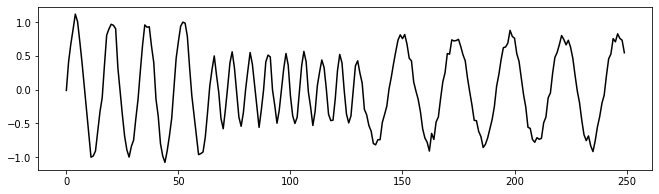

In [3]:
np.random.seed(12345)

d = [1.0 * math.sin(t * math.pi / 8) for t in range(64)]
d += [0.5 * math.sin(t * math.pi / 4) for t in range(64, 134)]
d += [0.8 * math.sin(t * math.pi / 12) for t in range(134, 250)]
d = [x + 0.06 * np.random.standard_normal() for x in d]

plt.figure(figsize=(11, 3))
plt.plot(d, color="black");

### Preparación de datos

In [4]:
#
#  Para pronosticar el valor actual se toman los `L`
#  valores previos de la serie
#
L = 5

#
# Forma la matriz X
#
X = []
for t in range(L, len(d)):
    X.append(d[t - L : t].copy())

#
# Primeras 3 filas
#
X[0:3]

[[-0.012282459569082776,
  0.41142003264854266,
  0.6759404582831432,
  0.8905357142504373,
  1.1179468343501628],
 [0.41142003264854266,
  0.6759404582831432,
  0.8905357142504373,
  1.1179468343501628,
  1.0074838824896661],
 [0.6759404582831432,
  0.8905357142504373,
  1.1179468343501628,
  1.0074838824896661,
  0.7126812537911706]]

### Modelo

In [5]:
adaline = Adaline(
    learning_rate=0.05,  # tasa de aprendizaje
    max_epochs=1,  # número máximo de iteraciones sobre el set de datos
    shuffle=False,  # mezcla patrones para aprendizaje online
    random_state=123,  # corrida reproducible
    warm_start=False,  # inicia con pesos aleatorios
)

errors2, forecasts = adaline.fit(
    X,
    d[L:],
)

#
# Pronóstico
#
plt.figure(figsize=(14, 3))
plt.plot(d, color="black")
plt.plot(range(L, len(d)), forecasts, color="red");

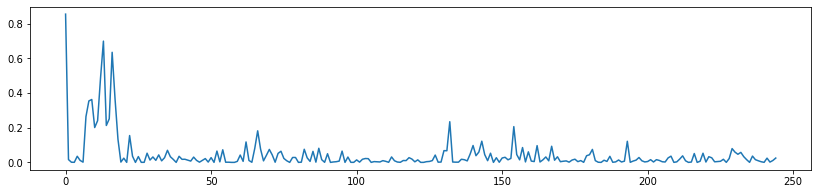

In [8]:
#
# Errores
#
plt.figure(figsize=(14, 3))
plt.plot(errors2);

## Caso de aplicación --- Identificación de sistemas

### Definición del problema

Cuando un sistema desconocido es excitado mediante una señal de entrada $z(k)$ se produce una señal de salida $d(k)$. El diagrama del sistema aparece en la figura de abajo. Para efectos de control se requiere un modelo que permita pronosticar el valor de $d(k)$ a partir del valor actual y los valores pasados de la señal de entrada $z(k)$, $z(k-1)$, $z(k-2)$, ... El diagrama ilustrativo es presentado a continuación.



![assets/AdalineIdentificacion-01.png](assets/AdalineIdentificacion-01.png)

En este tipo de problemas no es posible modelar el sistema que genera la señal de salida $d(t)$. Adicionalmente, la señal está contaminada con ruído por lo que resulta imposible pronosticarla de forma perfecta. Por facilidad se supondra que la dinámica del sistema desconocido es descrita por siguiente ecuación no lineal:

$$d_t = 0.4 + 0.1 z_{t} + 0.9 z_{t-1} - 0.6 z_{t-2} - 0.2 z_{t-1}^2 + u_t$$

donde $u_t$ es una variable aleatoria normal con $\mu=0$ y $\sigma = 0.05$.  $z_t$ es una variable aleatoria uniforme en el intervalo $[0,1]$. A continuación se generan las series.

El problema propuesto es conocido como un problema de identificación de sistemas, donde un modelo adaptativo (una red neuronal en este caso) debe aproximar el comportamiento real (la salida, $d_t$) de un sistema desconocido a partir de un conjunto de entradas (el vector $\mathbf{x}_t$) conocidas. El diagrama esquemático del sistema es el siguiente: 

![assets/AdalineIdentificacion-02.png](assets/AdalineIdentificacion-02.png)

### Dataset

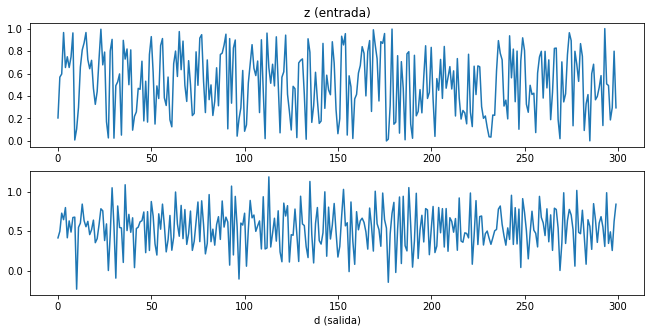

In [12]:
np.random.seed(12345)
z = np.random.uniform(size=303)
d = 0.05 * np.random.standard_normal(303)

L = 2

for t in range(2, 303):
    d[t] = (
        d[t] + 0.4 + 0.1 * z[t] + 0.9 * z[t - 1] - 0.6 * z[t - 2] - 0.2 * z[t - 1] ** 2
    )

d = d[3:303]
z = z[3:303]

plt.figure(figsize=(11, 5))
plt.subplot(2, 1, 1)
plt.plot(z)
plt.title("z (entrada)")
plt.subplot(2, 1, 2)
plt.plot(d)
plt.xlabel("d (salida)");

En términos de los datos se requiere construir un modelo de regresión que permita pronosticar $d_t$ a partir de los valores $z_t$, $z_{t-1}$, ...

### Preparación de datos

In [13]:
#
#  Para pronosticar el valor actual se toman los `L`
#  valores previos de la serie explicativa
#
L = 5

#
# Forma la matriz X
#
X = []
for t in range(L, len(d)):
    X.append(z[t - L : t].tolist())

#
# Primeras 3 filas
#
X[0:3]

[[0.2045602785530397,
  0.5677250290816866,
  0.5955447029792516,
  0.9645145197356216,
  0.6531770968715709],
 [0.5677250290816866,
  0.5955447029792516,
  0.9645145197356216,
  0.6531770968715709,
  0.7489066375339118],
 [0.5955447029792516,
  0.9645145197356216,
  0.6531770968715709,
  0.7489066375339118,
  0.6535698708517353]]

### Modelo

In [14]:
#
# Especificación
#
adaline = Adaline(
    learning_rate=0.08,  # tasa de aprendizaje
    max_epochs=1,        # número máximo de iteraciones sobre el set de datos
    shuffle=False,       # mezcla patrones para aprendizaje online
    random_state=123,    # corrida reproducible
    warm_start=False,    # pesos iniciales aleatorios
)  

#
# Entrenamiento
#
errors2, forecasts = adaline.fit(X, d[L:])

plt.figure(figsize=(14, 3))
plt.plot(d, color="black")
plt.plot(range(L, len(d)), forecasts, color="red");

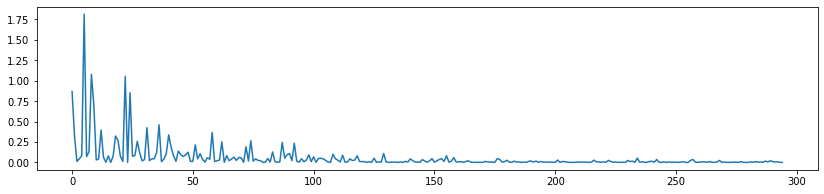

In [17]:
#
# Errores
#
plt.figure(figsize=(14, 3))
plt.plot(errors2);

## Caso de aplicación --- Clasificación

### Definición del problema

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:


* Cada patrón de entrada tiene la forma $\mathbf{x}=[+1,x_1,x_2,…,x_n ]$.


* Los parámetros del ADALINE son $\mathbf{w}=[w_0,w_1,…,w_n]$ tal que $y=\varphi(\mathbf{w}^T \mathbf{x})$.


* Se desea encontrar el vector $\mathbf{w}$ tal que el ADALINE clasifique correctamente todos los patrones de entrenamiento.


* El error del ADALINE con parámetros $\mathbf{w}$, $E(\mathbf{w})$, es la cantidad de patrones mal clasificados.

El siguiente diagrama representa como sería solucionado el problema mediante un perceptrón binario. Si la salida del perceptrón es $+1$, la correspondiente entrada $(x_1, x_2)$ es clasificada en la clase $C_2$, y si la salida es $-1$ la entrada es clasificada en la clase $C_1$. 

![../assets/AdalineClasificacion-01.png](assets/AdalineClasificacion-01.png)


La frontera de decisión se obtiene al hacer cero la entrada al ADALINE:

$$v=w_0+\sum_{i=}^n w_i x_i =0 $$

* La frontera de decisión es ortogonal al vector de pesos.


* Se puede suponer un vector direccional  y luego despejar el intercepto.


* Para redes de neuronas ADALINE (MADALINE), cada neurona de salida tiene su propia frontera de decisión.

A continuación se presenta la frontera de decisión generada por un ADALINE para la función lógica AND:

![../assets/AdalineClasificacion-02.png](assets/AdalineClasificacion-02.png)

### Dataset

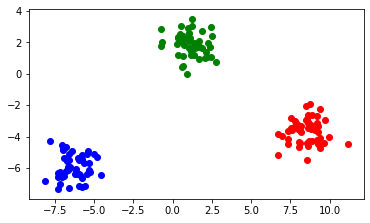

In [18]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

### Modelos

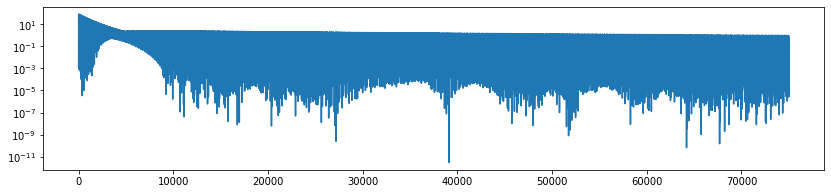

In [19]:
adaline_A = Adaline(
    learning_rate=0.00001,  # tasa de aprendizaje
    max_epochs=500,  # número máximo de iteraciones sobre el set de datos
    shuffle=True,  # mezcla patrones para aprendizaje online
    random_state=123,  # corrida reproducible
    warm_start=False,
)  # inicia con pesos aleatorios

A = [+1 if u == 0 else -1 for u in d]

errors2, _ = adaline_A.fit(X, A)

plt.figure(figsize=(14, 3))
plt.plot(errors2)
plt.yscale("log");

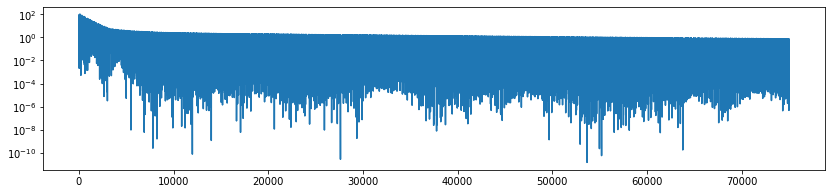

In [20]:
adaline_B = Adaline(
    learning_rate=0.00001,  # tasa de aprendizaje
    max_epochs=500,  # número máximo de iteraciones sobre el set de datos
    shuffle=True,  # mezcla patrones para aprendizaje online
    random_state=123,  # corrida reproducible
    warm_start=False,
)  # inicia con pesos aleatorios

B = [+1 if u == 1 else -1 for u in d]

errors2, _ = adaline_B.fit(X, B)

plt.figure(figsize=(14, 3))
plt.plot(errors2)
plt.yscale("log");

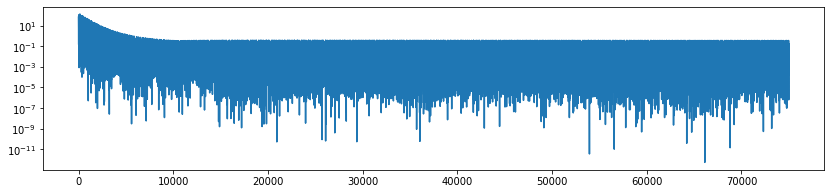

In [21]:
adaline_C = Adaline(
    learning_rate=0.00001,  # tasa de aprendizaje
    max_epochs=500,  # número máximo de iteraciones sobre el set de datos
    shuffle=True,  # mezcla patrones para aprendizaje online
    random_state=123,  # corrida reproducible
    warm_start=False,
)  # inicia con pesos aleatorios

C = [+1 if u == 2 else -1 for u in d]

errors2, _ = adaline_C.fit(X, C)

plt.figure(figsize=(14, 3))
plt.plot(errors2)
plt.yscale("log");

### Fronteras de decisión

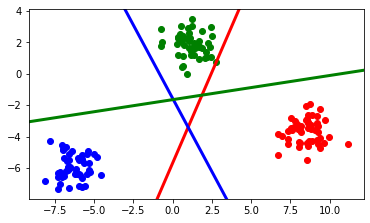

In [22]:
plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (
    -adaline_A.intercept_ / adaline_A.coef_[1]
    - adaline_A.coef_[0] / adaline_A.coef_[1] * xplot
)

fronteraB = (
    -adaline_B.intercept_ / adaline_B.coef_[1]
    - adaline_B.coef_[0] / adaline_B.coef_[1] * xplot
)

fronteraC = (
    -adaline_C.intercept_ / adaline_C.coef_[1]
    - adaline_C.coef_[0] / adaline_C.coef_[1] * xplot
)

plt.plot(xplot, fronteraA, color="red", linewidth=3)
plt.plot(xplot, fronteraB, color="blue", linewidth=3)
plt.plot(xplot, fronteraC, color="green", linewidth=3)

plt.xlim(xlim)
plt.ylim(ylim);